# Exercise 3

## Rosenbrock Function

### Define Objective Function as Individual 

In [306]:
%matplotlib inline
from scipy.optimize import minimize, Bounds
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from scipy import stats

def banana(x):
    #print(x)
    x1, x2 = list(x)
    return 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2

def evaluate_banana(individual):
    return banana(individual),

def generate_banana_ind(icls):
    return icls(random.sample(range(-50//10,50//10),2))

### Define Individual, Population and Operators

In [307]:
from deap import base, creator, tools
import random

creator.create("FitnessMin", base.Fitness, weights=(-1,))
creator.create("Individual", list, fitness=creator.FitnessMin)

#Step 1: Setup for Initialize Population
IND_SIZE = 100

toolbox = base.Toolbox()
toolbox.register("attribute", random.random)
toolbox.register("individual", generate_banana_ind, icls=creator.Individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("evaluate", evaluate_banana)

/Users/arul/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/arul/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


### Define Genetic Algorithm

In [308]:
def banana_algo():
    plt.figure()
    pop = toolbox.population(n=50)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 40

    # Evaluate the entire population
    fitnesses = [toolbox.evaluate(p) for p in pop]
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    i=0
    for g in range(NGEN):
        i=i+1
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = [toolbox.clone(off) for off in offspring]

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        if i%5==0:
            plt.plot([i for i in range(len(offspring))], [banana(ind) for ind in offspring], label=f"Gen-{i}")
        # The population is entirely replaced by the offspring
        pop[:] = offspring
    plt.title("Exercise 3: Rosenbrok  Function")
    plt.xlabel("Individuals")
    plt.ylabel("Function Value")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),\
          fancybox=True, shadow=True, ncol=5)
    plt.show()
    return pop

### Run Algorithm

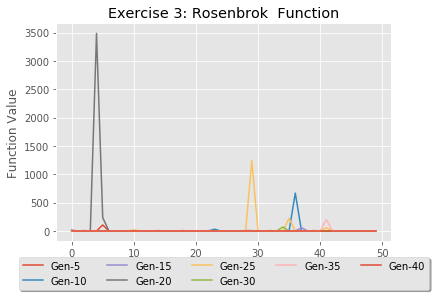

In [309]:
banana_result = banana_algo()
#print(banana_result)

### Observations:

1. Generation 20 performed worse than Generation 5, which is surprising. 
2. It also seems Generation 40 is the only one which has all the population close to minimum
3. Default settings for crossover and mutation are kept

## Eggcrate Function

### Define Objective Function as Individual 

In [310]:
import math

def eggcrate(x):
    x1, x2 = list(x)
    return x1 ** 2 + x2 ** 2 + 25 * (math.sin(x1) ** 2 + math.sin(x2) ** 2)

def egg_evaluate(individual):
    return eggcrate(individual),

def generate_eggind(icls):
    return icls(random.sample(range(0 - (2 * (22//7)), int(2 * (22//7))),2))

### Define Individual, Population and Operators

In [311]:
creator.create("FitnessMinEgg", base.Fitness, weights=(-1,))
creator.create("Individual", list, fitness=creator.FitnessMinEgg)

#Step 1: Setup for Initialize Population
IND_SIZE = 100

egg_toolbox = base.Toolbox()
egg_toolbox.register("attribute", random.random)
egg_toolbox.register("individual", generate_eggind, icls=creator.Individual)
egg_toolbox.register("population", tools.initRepeat, list, egg_toolbox.individual)
egg_toolbox.register("select", tools.selTournament, tournsize=3)
egg_toolbox.register("mate", tools.cxTwoPoint)
egg_toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
egg_toolbox.register("evaluate", egg_evaluate)

/Users/arul/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMinEgg' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


### Define Genetic Algorithm

In [312]:
plt.figure()
def egg_algo():
    pop = egg_toolbox.population(n=50)
    #print(f"Initial Population:{pop}")
    CXPB, MUTPB, NGEN = 0.5, 0.2, 40

    # Evaluate the entire population
    fitnesses = [egg_toolbox.evaluate(p) for p in pop]
    #print(f"Fitnesses: {fitnesses}")
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    i=0
    for g in range(NGEN):
        i=i+1
        # Select the next generation individuals
        offspring = egg_toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = [egg_toolbox.clone(off) for off in offspring]

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                egg_toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                egg_toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(egg_toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        if i % 5 ==0:
            plt.plot([i for i in range(len(offspring))], [eggcrate(ind) for ind in offspring], label=f"Gen-{i}")
        # The population is entirely replaced by the offspring
        pop[:] = offspring
    plt.title("Exercise 3: Eggcrate Function")
    plt.xlabel("Individuals")
    plt.ylabel("Function Value")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),\
          fancybox=True, shadow=True, ncol=5)
    plt.show()
    return pop

<Figure size 432x288 with 0 Axes>

### Run Algorithm

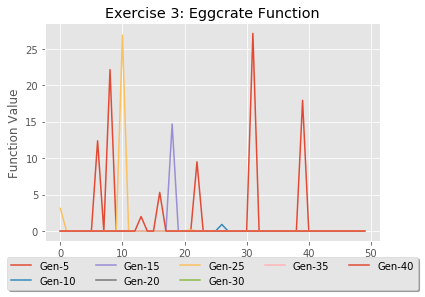

In [313]:
egg_result = egg_algo()
#print(egg_result)

### Observations:

1. Huge differences in function values across generations
2. No patterns seem to be visible, as even Generation 35 has a huge spike
3. Most of the population in Generation 40 seem to be closer to minimum. Performed better than scipy.minimize

## Golinski Speed Reducer

### Define Objective Function as Individual, Constraint Functions and Bound Samples

In [314]:
def golinksi(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 0.7854 * x1 * (x2 ** 2) * (3.3333 * (x3 ** 2) + 14.9334 * x3 - 43.0934) \
           - 1.5079 * x1 * ((x6 ** 2) + (x7 ** 2)) + 7.477 * ((x6 ** 3) + (x7 ** 3)) \
           + 0.7854 * (x4 * (x6 ** 2) + (x5 * (x7 ** 2)))

def evaluate_gol(individual):
    return golinksi(individual),

def generate_golind(icls):
    b1 = random.uniform(2.6, 3.6)
    b2 = random.uniform(0.7, 0.8)
    b3 = random.uniform(17, 28)
    b4 = random.uniform(7.3, 8.3)
    b5 = random.uniform(7.3, 8.3)
    b6 = random.uniform(2.9, 3.9)
    b7 = random.uniform(5, 5.5)
    return icls([b1,b2,b3,b4,b5,b6,b7])

def gol_cons1(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    res = 1 - (27 * (x1 ** -1) * (x2 ** -2) * (x3 ** -1))
    if res==0:
        return True
    else:
        return False


def gol_cons2(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    res = 1 - (397.5 * (x1 ** -1) * (x2 ** -2) * (x3 ** -2))
    if res==0:
        return True
    else:
        return False


def gol_cons3(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return - (1.93 * (x2 ** -1) * (x3 ** -1) * (x4 ** 3) * (x6 ** -4) - 1)

def gol_cons4(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return - (1.93 * (x2 ** -1) * (x3 ** -1) * (x5 ** 3) * (x7 ** -4) - 1)

def gol_cons5(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    numerator = ((745 * x4 * (x2**-1) *(x3**-1))**2 + 16.9* (10**6)) ** 0.5
    denominator = (110.0 * (x6**3))
    return 1 - (numerator/denominator)

def gol_cons6(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    numerator = ((745 * x5 * (x2**-1) *(x3**-1))**2 + 157.5* (10**6)) ** 0.5
    denominator = (85.0 * (x7**3))
    return 1 - (numerator/denominator)

def gol_cons7(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - (x2*x3/40)

def gol_cons8(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - (5*x2/x1)

def gol_cons9(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - (x1/(12*x2))

def gol_cons24(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - ((1.5 * x6 + 1.9) * (x4**-1))

def gol_cons25(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - ((1.1 * x7 + 1.9) * (x5**-1))

### Define Individual, Population and Operators

In [315]:
creator.create("FitnessMinGol", base.Fitness, weights=(-1,))
creator.create("Individual", list, fitness=creator.FitnessMinGol)

#Step 1: Setup for Initialize Population
IND_SIZE = 1000

gol_toolbox = base.Toolbox()
gol_toolbox.register("attribute", random.random)

gol_toolbox.register("individual", generate_golind, icls=creator.Individual)
gol_toolbox.register("population", tools.initRepeat, list, gol_toolbox.individual)
gol_toolbox.register("select", tools.selTournament, tournsize=3)
gol_toolbox.register("mate", tools.cxBlend, alpha=0.2)
gol_toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=2, indpb=0.1)

gol_toolbox.register("evaluate", evaluate_gol)
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons1,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons2,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons3,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons4,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons5,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons6,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons7,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons8,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons9,0.55))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons24,0.5))
gol_toolbox.decorate("evaluate", tools.DeltaPenalty(gol_cons25,0.5))

# Added bounds to the GA, but DEAP generates lot of NoneType offsprings which breaks the algroithm.
#Couldn't figure out why. Need to investigate further
def check_bounds(child, min, max):
    if child > max:
        child = max
    elif child < min:
        child = min

def checkBounds():
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                if child[0] == None:
                    l = list(offspring)
                    l.remove([None, None, None, None, None, None, None])
                    offspring = tuple(l)
                    continue
                child[0] = check_bounds(child[0],2.6,3.6)
                child[1] = check_bounds(child[1],0.7,0.8)
                child[2] = check_bounds(child[2],17,28)
                child[3] = check_bounds(child[3],7.3,8.3)
                child[4] = check_bounds(child[4],7.3,8.3)
                child[5] = check_bounds(child[5],2.9,3.9)
                child[6] = check_bounds(child[6],5,5.5)
            return offspring
        return wrapper
    return decorator

#gol_toolbox.decorate("mate", checkBounds())
#gol_toolbox.decorate("mutate", checkBounds())

/Users/arul/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMinGol' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


### Define Genetic Algorithm

In [316]:
def gol_algo(cxpb,mutpb,ngen,gen):
    plt.figure()
    pop = gol_toolbox.population(n=80)
    #print(f"Initial Population:{pop}")
    CXPB, MUTPB, NGEN = cxpb,mutpb,ngen

    # Evaluate the entire population
    fitnesses = [gol_toolbox.evaluate(p) for p in pop]
    #print(f"Fitnesses: {fitnesses}")
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    i=0
    for g in range(NGEN):
        i=i+1
        # Select the next generation individuals
        offspring = gol_toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = [gol_toolbox.clone(off) for off in offspring]

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                gol_toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                gol_toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(gol_toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        if i % gen ==0:
            plt.plot([i for i in range(len(offspring))], [golinksi(ind) for ind in offspring], label=f"Gen-{i}")
        # The population is entirely replaced by the offspring
        pop[:] = offspring

    plt.title("Exercise 3: Golinski Speed Reducer")
    plt.xlabel("Individuals")
    plt.ylabel("Function Value")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),\
          fancybox=True, shadow=True, ncol=5)
    plt.show()
    return pop

### Run Algorithm and Tuning

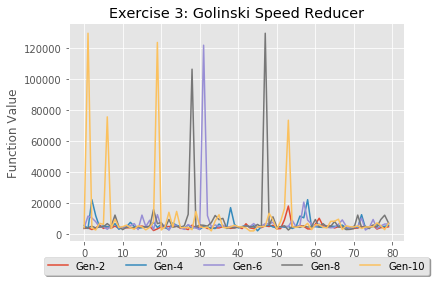

Last Individual[2.947266226523906, 0.9251505292852948, 27.100241321343045, 7.755708771791972, 7.691356767662049, 3.27229818295863, 5.260592812624996]
Mean of last population: 10465.56640973817
Median of last population: 4762.614942537115
Mode of last population: ModeResult(mode=array([4823.56174389]), count=array([4]))


In [317]:
# Run with default values for crossover  and mutation  
gol_result = gol_algo(0.5,0.2,10,2)
print(f"Last Individual{gol_result[-1]}")
gol_obj = [golinksi(ind) for ind in gol_result]
print(f"Mean of last population: {np.mean(gol_obj)}")
print(f"Median of last population: {np.median(gol_obj)}")
print(f"Mode of last population: {stats.mode(gol_obj)}")

#### Does not converge to the gloabl mimimum  after 10 generations. But performance improved. Mode is at 4823. We expect to be closer to 2994

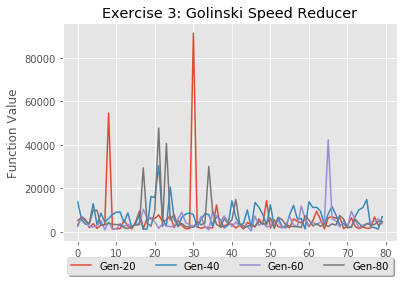

Last Individual[3.8038320546253352, 0.5753915538295453, 21.81394566277156, 7.8787110141129, 8.718386967738594, 4.3910350164901075, 6.78784009616543]
Mean of last population: 5902.291595526088
Median of last population: 3770.826151451706
Mode of last population: ModeResult(mode=array([3332.71976312]), count=array([3]))


In [318]:
# Decrease crossover and increase mutation by 0.1
gol_result = gol_algo(0.4,0.2,80,20)
print(f"Last Individual{gol_result[-1]}")
gol_obj = [golinksi(ind) for ind in gol_result]
print(f"Mean of last population: {np.mean(gol_obj)}")
print(f"Median of last population: {np.median(gol_obj)}")
print(f"Mode of last population: {stats.mode(gol_obj)}")

#### Not much improvement. Mode is at 3332. We expect to be closer to 2994

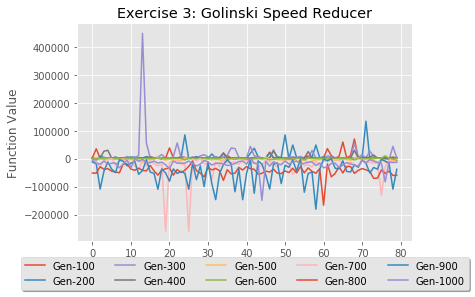

Last Individual[-6.274218311869699, -1.7813652954050592, 14.1472155376577, 3.877242004210742, 17.651725721070203, -0.23244453642296095, 2.6496105322502808]
Mean of last population: -18263.189412134565
Median of last population: -15740.468260920747
Mode of last population: ModeResult(mode=array([-15660.91611131]), count=array([4]))


In [319]:
# Run with increase population of 1000 and also 1000 generations. 
gol_result = gol_algo(0.4,0.3,1000,100)
print(f"Last Individual{gol_result[-1]}")
gol_obj = [golinksi(ind) for ind in gol_result]
print(f"Mean of last population: {np.mean(gol_obj)}")
print(f"Median of last population: {np.median(gol_obj)}")
print(f"Mode of last population: {stats.mode(gol_obj)}")

#### Performance worsened. And we are getting different values everytime. This may be due to the fact that the bounds are not added. It's worthwhile to repeat the experiment after adding it